In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# #12.1 (Categorical Data)

* Background and Motivation

In [44]:
# A funcão take reconhece um Series como um parâmtro de identificação de outro Series

# Vamos supor que somos donos de uma hamburgueria e servimos três lanches (x-salada, x-egg e x-bacon)
# Cada lanche terá o seu próprio código
d = {'x-salada' : 0, 'x-egg': 1, 'x-bacon' : 2}
produtos = pd.Series([produto for produto in d.keys()])

# Com o nosso Series de produtos criado, vamos criar um Series de um dia de vendas de lanches
# Cada vez que um produto é vendido, seu código é computado em um Series do pandas
# Portanto, vamos ter, para um dia em que vendemos 20 lanches:
pedidos = pd.Series([np.random.randint(0, 3) for i in range(20)])
pedidos.sort_values(inplace=True)

# Agora, vamos traduzir cada código do Series de pedidos para o seu respectivo lanche

produtos.take(pedidos)


0    x-salada
0    x-salada
0    x-salada
1       x-egg
1       x-egg
1       x-egg
1       x-egg
1       x-egg
1       x-egg
1       x-egg
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
2     x-bacon
dtype: object

* Categorical Type in pandas

In [65]:
# O pandas possui uma espécie de modalidade de agrupamento de dados conhecido como pd.Categorical
# Ele é capaz de categorizar dados de um DF ou Series numericamente

# Como prática, vamos utilizar a lista de atletas que participaram da última Olimpíada de Tóquio
atletas = pd.read_excel('Athletes.xlsx')

# Nas Olimpíadas, cada atleta aqui compete por um determinado esporte
# Nesse sentido, podemos categorizar cada esporte olímpico com um número!

atletas['Discipline'] = atletas['Discipline'].astype('category')

# Acabamos de converter a coluna Disciplines para o tipo category!
atletas.dtypes

# As 46 modalidades de esporte foram categorizadas com sucesso!
atletas['Discipline']

0               Cycling Road
1        Artistic Gymnastics
2                     Rowing
3                 Basketball
4                 Basketball
                ...         
11080                 Hockey
11081           Canoe Slalom
11082               Shooting
11083                Sailing
11084                Archery
Name: Discipline, Length: 11085, dtype: category
Categories (46, object): ['3x3 Basketball', 'Archery', 'Artistic Gymnastics', 'Artistic Swimming', ..., 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']

In [75]:
# Voltando ao exemplo da hamburgueria, podemos categorizar cada lanche com um determindo código
d = {'x-salada' : 0, 'x-egg': 1, 'x-bacon' : 2}
produtos = [produto for produto in d.keys()]
pedidos = [np.random.randint(0, len(produtos)) for i in range(20)]
print(pedidos)

pd.Categorical.from_codes(pedidos, produtos)

[1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2]


['x-egg', 'x-salada', 'x-bacon', 'x-salada', 'x-egg', ..., 'x-salada', 'x-bacon', 'x-egg', 'x-bacon', 'x-bacon']
Length: 20
Categories (3, object): ['x-salada', 'x-egg', 'x-bacon']

In [5]:
# Podemos também ordenar as categorias criadas
# Digamos que, em um jogo de tiro, temos quatro ranking de jogadores (bronze, prata, ouro, diamante)
# No entanto, um bug ocorreu no jogo, ao invés de mostrar o nome da categoria, o resultado final de uma partida
# está mostrando apenas o código de categoria dos jogadores

# Vamos consertar o erro!
deathmatch = pd.read_csv('deathmatch.csv', index_col=0, sep=',', skipinitialspace=True)
categories = ['Bronze', 'Silver', 'Gold', 'Diamond']
display(deathmatch)

# Vamos impor uma hierarquia em nossa categotização
deathmatch.rename(columns={'Category_Code':'Category'}, inplace=True)
deathmatch['Category'] = pd.Categorical.from_codes(deathmatch['Category'], categories, ordered=True)
deathmatch['Category']

,Category_Code,Team,Kills,Deaths
Player,,,,
Pedro,3,Blue,23,5
Guilherme,0,Blue,12,6
João L.,1,Red,1,8
Kássio F.,2,Blue,12,3
Luís,1,Red,14,2
Olivio,3,Blue,20,0
Felipe V.,2,Red,12,3
Lauro,0,Blue,6,5
Pedro M.,1,Blue,11,3


Player
Pedro        Diamond
Guilherme     Bronze
João L.       Silver
Kássio F.       Gold
Luís          Silver
Olivio       Diamond
Felipe V.       Gold
Lauro         Bronze
Pedro M.      Silver
Fabricio        Gold
Name: Category, dtype: category
Categories (4, object): ['Bronze' < 'Silver' < 'Gold' < 'Diamond']

In [94]:
# Praticando o pd.Categorical - Simulando um sistema de avaliação de loja pelos consumidores
import random
nomes = pd.read_csv('nomes.csv')
nota = [np.random.randint(0,5) for i in range(5)]
index = []
for i in range(5):
    while True:
        name = random.choice(nomes['Nome'])
        if name not in index:
            index.append(name)
            break
        else:
            continue
        
avaliacao = pd.DataFrame(nota, index=index, columns=['Nota'])
avaliacao
        
    

,Nota
Jair,4
Camila,3
Raquel,2
Felipe,4
Tiago,4


In [95]:
classificacao = ['Péssimo', 'Ruim', 'Médio', 'Bom','Excelente']
avaliacao = pd.DataFrame(nota, index=index, columns=['Nota'])
avaliacao['Nota'] = pd.Categorical.from_codes(codes= avaliacao['Nota'], categories= classificacao)
avaliacao

,Nota
Jair,Excelente
Camila,Bom
Raquel,Médio
Felipe,Excelente
Tiago,Excelente


* Computations with Categoricals

In [153]:
# Vamos utilizar o qcut, visto anteriormente no livro

pfizer = pd.read_csv('PFE.csv', index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True)

# Vamos escolher trabalhar apenas com os valores da Pfizer de 2001
pfizer_2001 = pfizer.loc['2001-01-01': '2001-12-31' , :]

cortes = pd.qcut(pfizer_2001['Adj Close'], q=4, labels = ['Low', 'Medium', 'High', 'Verge'])
cortes2 = pd.qcut(pfizer_2001['Adj Close'], q=4)
cortes2

Date
2001-01-02    (19.837, 21.071]
2001-01-03    (19.837, 21.071]
2001-01-04    (18.604, 19.192]
2001-01-05    (19.192, 19.837]
2001-01-08    (18.604, 19.192]
                    ...       
2001-12-24    (18.604, 19.192]
2001-12-26    (18.604, 19.192]
2001-12-27    (18.604, 19.192]
2001-12-28    (18.604, 19.192]
2001-12-31    (16.334, 18.604]
Name: Adj Close, Length: 248, dtype: category
Categories (4, interval[float64]): [(16.334, 18.604] < (18.604, 19.192] < (19.192, 19.837] < (19.837, 21.071]]

In [165]:
a=np.array([i for i in range(248)])
x = pd.qcut(a, q=4)

In [170]:
# Vamos produzir uma planilha mais detalhada sobre o noso qcut 
display(pfizer_2001.groupby(x).agg([np.size, sum, np.mean, np.std]) )
display(pfizer_2001.groupby(cortes2).agg([np.size, sum, np.mean, np.std]) )

Adj Close                                  
                     size          sum       mean       std
(-0.001, 61.75]      62.0  1205.154423  19.437975  1.234549
(61.75, 123.5]       62.0  1210.062308  19.517134  0.685239
(123.5, 185.25]      62.0  1132.493644  18.266027  0.687719
(185.25, 247.0]      62.0  1199.418151  19.345454  0.547402

Adj Close                                  
                      size          sum       mean       std
Adj Close                                                   
(16.334, 18.604]      62.0  1107.855666  17.868640  0.611601
(18.604, 19.192]      62.0  1168.647532  18.849154  0.149952
(19.192, 19.837]      62.0  1211.525324  19.540731  0.200457
(19.837, 21.071]      62.0  1259.100004  20.308065  0.323752

In [185]:
lanches =pd.Series(['pizza', 'doces', 'hamburguer', 'chips']) 

%time _ = lanches.astype('category')

CPU times: user 1 ms, sys: 83 µs, total: 1.09 ms
Wall time: 1.02 ms


* Better Performance with Categoricals

In [194]:
# Aqui, o livro demonstra a alta eficiência e baixo consumo de memória dos Categoricals

In [193]:
# Dica do livro: para medir o tempo de execução de um programa, utilizar %time _

def ran(N):
    return [i for i in range(N)]

%time _ = ran(100000000)

CPU times: user 7.27 s, sys: 2.22 s, total: 9.49 s
Wall time: 10.2 s


* Categorical Methods

In [6]:
# Digamos que tenhamos criado um objeto category com algumas categorias
player = pd.read_csv('players_fifa22.csv', usecols=['Name','Club', 'Height'])

# Vejamos o time inteiro do Flamengo no Fifa
flamengo = player[player['Club']=='Flamengo'].sort_values(by='Height', ascending=False)

# Poderíamos realizar transformar a coluna Height em um category object
altura = pd.qcut(flamengo['Height'] , q=3, labels = ['Baixo', 'Médio', 'Alto'])
altura.cat.categories

# No entanto, poderíamos desejar ter criado uma quarta categoria, que compreendesse os jogadores com mais de 2 metros
# O Flamengo pode não ter nenhum jogador com essas características, mas desejamos que a nova categoria 
                                                                            # seja reconhecida como presente
    
categorias_reais = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
altura_corrigida = altura.cat.set_categories(categorias_reais)
altura_corrigida

2210     Alto
843      Alto
2260     Alto
2815     Alto
2214     Alto
296      Alto
489     Médio
2050    Médio
4698    Médio
1917    Médio
995     Médio
2622    Médio
2340    Baixo
3395    Baixo
828     Baixo
832     Baixo
829     Baixo
3230    Baixo
1585    Baixo
845     Baixo
Name: Height, dtype: category
Categories (4, object): ['Baixo' < 'Médio' < 'Alto' < 'Muito Alto']

In [27]:
# Outras funcionalidades para Category: podemos renomear as categorias

# Vamos traduzir o nome das categorias do português para o inglês!
alturas_fifa = pd.qcut(player['Height'], q=4, labels = ['Baixo', 'Médio','Alto', 'Muito Alto'])
alturas_fifa.cat.rename_categories(['Low','Medium','High', 'Verge'])

# Podemos, também, remover a hierarquia entre as categorias
alturas_fifa.cat.as_unordered()

0             Baixo
1              Alto
2              Alto
3        Muito Alto
4             Médio
            ...    
19243          Alto
19244         Baixo
19245         Baixo
19246         Médio
19247         Baixo
Name: Height, Length: 19248, dtype: category
Categories (4, object): ['Baixo', 'Médio', 'Alto', 'Muito Alto']

* Creating Dummy variables for Modeling

In [28]:
# get_dummies do pandas criará um relatório da ocorrência de cada categoria nas linhas do DF
# 1 indica a presença dessa categoria; 0, a sua não ocorrência
pd.get_dummies(alturas_fifa)

,Baixo,Médio,Alto,Muito Alto
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
19243,0,0,1,0
19244,1,0,0,0
19245,1,0,0,0
19246,0,1,0,0


<AxesSubplot:xlabel='Date'>

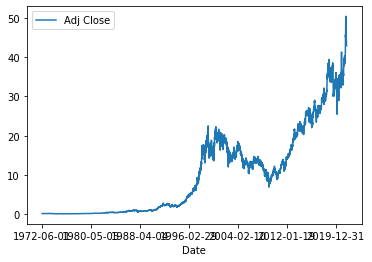

In [31]:
pfizer = pd.read_csv('PFE.csv', index_col=0, usecols=['Date', 'Adj Close'])
categories = pd.qcut(pfizer['Adj Close'],q=4, labels=['Low', 'Medium', 'High','Verge'])

pfizer['Status'] = categories
pfizer.plot()

# #12.2 (Advanced Groupby Use)

* Group Transforms and "Unwrapped" Groupbys

In [75]:
# Vamos utilizar o groupby de maneira mais inteligente com o transform
# Para nos ajudar, vamos utilizar uma base de dados com as informações de todas as lojas Starbucks no mundo!
# Importando a base de dados da Starbucks!

from pathlib import Path
import shutil
from zipfile import ZipFile
import datetime
import os
today = datetime.datetime.now().date()
current = Path.cwd()
downloads = current.parents[3] / 'Downloads'

for file in downloads.iterdir():
    if file.suffix=='.zip':
        timestamp = datetime.datetime.fromtimestamp(os.stat(file).st_birthtime).date()
        if timestamp==today:
            with ZipFile(file, 'r') as zip_file:
                zip_file.extractall()
                
# So let's get started!

In [5]:
# Mais alguns ajustes para aprendermos a utilizar o transoform
starbucks = pd.read_csv('directory.csv', usecols=['Country', 'Store Number','State/Province', 'City'])
starbucks_br = starbucks[starbucks['Country']=='BR']

# Para darmos uma melhorada na nossa base de dados, vamos criar valores de receita para cada loja no Brasil
# Esses valores serão obtidos com uma lista com valores aleatórios entre R$10000,00 e R$50000,00
receitas = [np.random.randint(10000,50000) for i in range(len(starbucks_br))]
starbucks_br['Store Revenue'] = receitas
starbucks_br

<ipython-input-5-2fd01f1c9171>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starbucks_br['Store Revenue'] = receitas


,Store Number,City,State/Province,Country,Store Revenue
354,16178-168205,Niteroi,RJ,BR,23856
355,15158-240092,Niteroi,RJ,BR,12241
356,24246-236684,Niteroi,RJ,BR,14679
357,16680-172329,Rio de Janeiro,RJ,BR,20265
358,25120-238328,Rio de Janeiro,RJ,BR,46098
...,...,...,...,...,...
451,17023-178613,Sao Paulo,SP,BR,19586
452,16703-159666,Sao Paulo,SP,BR,41965
453,15079-107036,Sao Paulo,SP,BR,32241
454,18060-187907,Sao Paulo,SP,BR,49373


In [93]:
# Com o DF criado, podemos fzer algumas operações com os seus valores de receita
# Poderíamos nos perguntar, por exemplo: qual é a média da receita das Starbucks por município?
display(starbucks_br.groupby('City').mean() )

# No entanto, poderíamos dar uma outra estética para o DF com base em nossas mesmas intenções
# Digamos que nós quiséssemos substituir o valor de receita de cada unidade starbucks pela receita média produzida
                                                                                            # em seu município
# Para essa tarefa, poderíamos utilizar o método transform acompanhado de uma função lambda
media = lambda x: np.mean(x)
cities = starbucks_br.groupby('City')
cities.transform(lambda x: x.mean())

# Como é possível enxergar, a primeira cidade do DF starbucks_br é de Niterói.
# Em "cities", pode-se ver que a receita média da cidade de Niterói agora ocupa o espaço anteriormente ocupado
                                                                                    # pela receita dessa loja.

,Store Revenue
City,
Atrium Térreo,34528.000000
Barueri,29217.000000
Bauru,17964.000000
Campinas,35060.000000
Guarulhos,24924.500000
Niteroi,16925.333333
Piracicaba,10583.000000
Ribeirao Preto,35466.333333
Rio de Janeiro,27993.800000


,Store Revenue
354,16925.333333
355,16925.333333
356,16925.333333
357,27993.800000
358,27993.800000
...,...
451,30949.895833
452,30949.895833
453,30949.895833
454,30949.895833


In [175]:
# Lição aprendida, o transform inibe a capacidade sintetizante do groupby, fazendo com que haja apenas a substituição
# dos valores das colunas por aqueles calculados no agrupamento
cities = starbucks_br.groupby('City')
# Vamos normalizar
value = lambda x: x

#def normalize(x):
    #return (value(x) - x.mean()) / x.std()
    
normalize = lambda x: (x - x.mean() )/ x.std()
display(starbucks_br)
cities.transform(normalize)#.transform(lambda x: normalize(x))

# Por algum motivo, não estamos conseguindo fazer essas operações...
# Ver depois

,Store Number,City,State/Province,Country,Store Revenue
354,16178-168205,Niteroi,RJ,BR,23856
355,15158-240092,Niteroi,RJ,BR,12241
356,24246-236684,Niteroi,RJ,BR,14679
357,16680-172329,Rio de Janeiro,RJ,BR,20265
358,25120-238328,Rio de Janeiro,RJ,BR,46098
...,...,...,...,...,...
451,17023-178613,Sao Paulo,SP,BR,19586
452,16703-159666,Sao Paulo,SP,BR,41965
453,15079-107036,Sao Paulo,SP,BR,32241
454,18060-187907,Sao Paulo,SP,BR,49373


,Store Revenue
354,1.131599
355,-0.764830
356,-0.366768
357,-0.724801
358,1.697798
...,...
451,-0.955722
452,0.926388
453,0.108584
454,1.549413


In [177]:
# Praticando o exemplo do livro
df = pd.DataFrame({'key':['a','b','c']*4,
                  'value':np.arange(12.0)})
g = df.groupby('key')['value']
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

* Grouped Time Resampling

In [183]:
from pandas.tseries.offsets import Week
# O método resample oferece algo similar a transform, mas para séries temporais

pfizer = pd.read_csv('PFE.csv', usecols=['Date','Adj Close'], index_col=0, parse_dates=True)

# Como pode-se ver, o DF pfizer mostra os valores das ações da Pfizer por dia
# No entanto, poderíamos querer que a divisão temporal fosse, por exemplo, a cada semana 
display(pfizer.resample(Week()).mean())

# Agora, temos um novo DF com a média semanal das ações da Pfizer
# Poderíamos dar um toque a mais e mudar as informações da coluna Date
pfizer.to_period(freq='W')

# Agora, estamos sendo mais claros que o período analisado é o de uma semana, e não dias isolados.

,Adj Close
Date,
1972-06-01,0.183906
1972-06-08,0.183349
1972-06-15,0.186024
1972-06-22,0.190036
1972-06-29,0.187584
...,...
2021-09-09,46.532499
2021-09-16,44.824000
2021-09-23,44.030000


,Adj Close
Date,
1972-05-29/1972-06-04,0.183906
1972-05-29/1972-06-04,0.181677
1972-06-05/1972-06-11,0.181120
1972-06-05/1972-06-11,0.185021
1972-06-05/1972-06-11,0.185021
...,...
2021-09-27/2021-10-03,43.570000
2021-09-27/2021-10-03,43.040001
2021-09-27/2021-10-03,43.529999


In [197]:
# Vamos mexer com outros dados...
from pathlib import Path
from shutil import move
import datetime
import os

current = Path.cwd()
downloads = current.parents[3] / 'Downloads'
today = datetime.datetime.now().date()

for file in downloads.iterdir():
    if file.suffix=='.zip':
        print(file.name)
        timestamp = datetime.datetime.fromtimestamp(os.stat(file).st_birthtime).date()
        if timestamp == today:
            move(str(file), current)

MacOSXCmapTools_v6.04_09-24-19.zip
archive (2).zip
archive (3).zip
Estratégia de Negócios - T10 - 222021 - 701 PM.zip
archive (4).zip
capa_email1-images.zip
MinimalSpanTreesSource.zip
doctopdf.zip
archive (5).zip
archive (6).zip
MinimalSpanTrees.zip
Arquivos_Lojas (1).zip
compressjpeg-3.zip
compressjpeg-2.zip
compressjpeg.zip
archive (7).zip
PSequel.1.5.3.app.zip
directory.csv.zip
Arquivos_Lojas.zip
Pajek32.zip
GitHubDesktop-x64.zip
archive.zip
archive (1).zip


In [207]:
import zipfile
for file in current.iterdir():
    if file.suffix == '.zip':
        print(file.name)
        with ZipFile(f'{file.name}', 'r') as zip_file:
            ZipFile.extractall(zip_file)

archive (7).zip


In [292]:
# O arquivo baixado é um histórico das emissões de CO-2 no mundo
import pandas as pd

co2 = pd.read_csv('CO2_Emissions_1960-2018.csv', index_col=0, parse_dates=True).fillna(0).T
co2.index = pd.to_datetime(co2.index)
co2['World'] = co2.sum(axis=1)

# Aqui, temos o histórico das emissões de Co2 do mundo, EUA e Brasil!
world_co2 = co2['World']
usa_co2 = co2['United States']
brazil_co2 = co2['Brazil']

In [293]:
# O método resample realiza um agrupamento com base em datas; seria uma espécie de groupby voltado a datas

# Por exemplo, ao invés de termos os dados brutos por ano, poderíamos querer a média de emissão de CO2 no mundo
                                                                                    # por década
world_co2.resample('10Y').mean()

1960-12-31     641.524584
1970-12-31     891.926378
1980-12-31    1239.656250
1990-12-31    1016.774790
2000-12-31     957.160879
2010-12-31    1038.478738
2020-12-31    1008.975700
Freq: 10A-DEC, Name: World, dtype: float64

In [294]:
# Agora, vamos fazer algo mais sofisticado
new_usa_co2 = pd.DataFrame(usa_co2)
new_usa_co2['Country'] = 'USA'
new_usa_co2.rename(columns={'United States':'CO2 Emissions'}, inplace=True)

new_brazil_co2 = pd.DataFrame(brazil_co2)
new_brazil_co2['Country'] = 'Brazil'
new_brazil_co2.rename(columns={'Brazil':'CO2 Emissions'}, inplace=True)

usa_brazil_co2 = new_usa_co2.append(new_brazil_co2)
usa_brazil_co2.sort_index(inplace=True)

# Digamos que nos tivéssemos um DF com as emissões de CO2 apenas de Brasil e EUA desde 1960
usa_brazil_co2


,CO2 Emissions,Country
1960-01-01,15.999779,USA
1960-01-01,0.649886,Brazil
1961-01-01,15.681256,USA
1961-01-01,0.662131,Brazil
1962-01-01,16.013937,USA
...,...,...
2016-01-01,15.131747,USA
2017-01-01,2.164422,Brazil
2017-01-01,14.805882,USA
2018-01-01,15.240875,USA


In [295]:
# Com esse DF criado, vamos calcular a emissão média de CO2 do Brasil e EUA nesse período inteiro (sem repartir
                                                                                    # o DF!)
# Como queremos agrupar os dados por país (string) e data (datetime),vamos ter que utilizar o Grouper do pandas
# para nos auxiliar

decada = pd.Grouper(freq='10Y')
# E voilà, sem muitas linhas de código, conseguimos extrair as informações desejadas sem precisar quebrar o DF
                                                                                # em Brasil e EUA
usa_brazil_co2.groupby(['Country', decada]).mean()

CO2 Emissions
Country                          
Brazil  1960-12-31       0.649886
        1970-12-31       0.769999
        1980-12-31       1.382072
        1990-12-31       1.381761
        2000-12-31       1.549161
        2010-12-31       1.822711
        2020-12-31       2.247138
USA     1960-12-31      15.999779
        1970-12-31      17.937578
        1980-12-31      21.437461
        1990-12-31      19.235434
        2000-12-31      19.660697
        2010-12-31      18.877633
        2020-12-31      15.651716

# #12.3 (Techniques for Method Chaining)

In [ ]:
# No decorrer de minha atividade com o pandas, muitas vezes eu quis criar uma coluna adicional em um DF utilizando
                                                                        # a seguinte maneira
df['Nova Coluna'] = valor

In [311]:
# No entanto, o pandas possui um método (assign), que deixa a escrita dessa operação mais sofisticada
pfizer = pd.read_csv('PFE.csv', index_col=0, parse_dates=True)

# Digamos que nós quiséssemos criar uma nova coluna no DF pfizer com a diferença do preço Close com o Open
# O Python interpreta toda a estrutura de .assign() como o novo DF com a coluna acrescentada
# Portanto, podemos, por exemplo, fazer um groupby a partir de um assign
pfizer.assign(CloseOpen = pfizer['Close']-pfizer['Open'])#.groupby([decada]).CloseOpen.mean()

# Nesse caso, estaríamos fazendo um groupby da coluna CloseOpen

# No caso do nosso exemplo, poderíamos também ter utilizado eval...

,Open,High,Low,Close,Adj Close,Volume,CloseOpen
Date,,,,,,,
1972-06-01,0.000000,0.815346,0.802993,0.815346,0.183906,2458771,0.815346
1972-06-02,0.815346,0.817817,0.802993,0.805463,0.181677,1613885,-0.009883
1972-06-05,0.805463,0.807934,0.798051,0.802993,0.181120,2585251,-0.002470
1972-06-06,0.802993,0.825229,0.800522,0.820288,0.185021,2347469,0.017295
1972-06-07,0.820288,0.820288,0.807934,0.820288,0.185021,1032077,0.000000
...,...,...,...,...,...,...,...
2021-09-27,43.919998,44.130001,43.509998,43.570000,43.570000,19955900,-0.349998
2021-09-28,43.070000,43.279999,42.430000,43.040001,43.040001,28512200,-0.029999
2021-09-29,43.220001,43.689999,43.080002,43.529999,43.529999,18037200,0.309998


In [342]:
# Sintetizando recortes de DF's

# Método tradicional
pfizer =pd.read_csv('PFE.csv', index_col=0, parse_dates=True, usecols=['Date','Open','Close','Adj Close'])
pfizer2 = pfizer[pfizer['Adj Close']>20] 

# Método sintético
pfizer = pd.read_csv('PFE.csv', index_col=0, parse_dates=True, usecols=['Date','Open','Close','Adj Close'])[lambda x:
                                                                                        x['Adj Close']>20]
# Podemos fazer já o recorte de nossos dados logo no carregamento do DF com um lambda!
# No caso, estamos pegando todas as linhas cujo valor de Adj Close seja maior do que 20

,Open,Close,Adj Close
Date,,,
1999-02-03,41.884090,42.299179,20.022266
1999-02-23,42.022453,42.338711,20.076237
1999-03-05,42.457306,43.188644,20.479265
1999-03-08,43.149113,44.137413,20.929150
1999-03-09,44.176945,43.840923,20.788565
...,...,...,...
2021-09-27,43.919998,43.570000,43.570000
2021-09-28,43.070000,43.040001,43.040001
2021-09-29,43.220001,43.529999,43.529999


In [373]:
# Podemos utilizar essa técnica para buscarmos linhas específicas de um DF
# Digamos que nós quiséssemos pegar um recorte das linhas 2 a 10 de um DF

    
nomes = pd.read_csv('nomes.csv', nrows=11)[lambda x: x.index>=2]
nomes


,Nome
2,João
3,Felipe
4,Daniel
5,Vanessa
6,Rafael
7,Guilherme
8,Olivio
9,Raquel
10,Rachel


In [382]:
usa_brazil_co2.groupby([usa_brazil_co2.index]).transform('mean')

,CO2 Emissions
1960-01-01,8.324833
1960-01-01,8.324833
1961-01-01,8.171693
1961-01-01,8.171693
1962-01-01,8.357856
...,...
2016-01-01,8.637622
2017-01-01,8.485152
2017-01-01,8.485152
2018-01-01,8.641374
